# Jaccard index computation between shape files
## Development version

This notebook illustrates the calculation of the Jaccard index between slums shape file and slighntly modified one denoting the municipality ground truth for the slums in Kalyan, India.

Python package imports

In [46]:
import os
import matplotlib.pyplot as plt
%matplotlib inline

#import fiona
from fiona import collection as ficol
from descartes import PolygonPatch

Paths and filenames

In [55]:
# data paths
TRUTH_SHAPE_PATH = "/home/elena/DynaSlum/Data/Kalyan/original/"
#TRUTH_SHAPE_PATH = "/home/elena/DynaSlum/Data/misc/"

# masks filename
slums_shape_fname = "slums_municipality_ROI.shp"
#slums_shape_fname = "coutwildrnp.shp"
#slums_shape_fname = "test_uk.shp"

# masks full filenames
truth_slums_shape_fullfname = os.path.join(TRUTH_SHAPE_PATH, slums_shape_fname)

print("Full shape filename: ", truth_slums_shape_fullfname)

Full shape filename:  /home/elena/DynaSlum/Data/Kalyan/original/slums_municipality_ROI.shp


Load data and display in figure

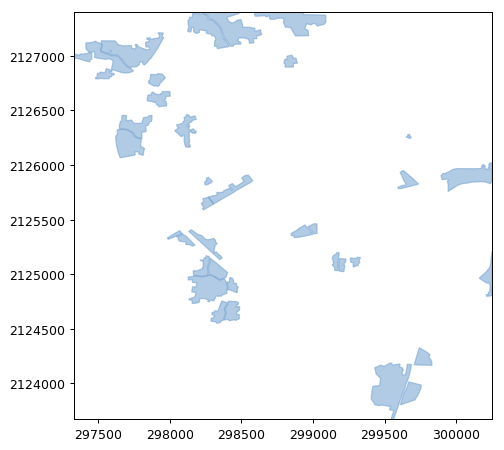

In [56]:
BLUE = '#6699cc'
fig = plt.figure(1, figsize=(6, 6), dpi=90)
ax = fig.add_subplot(111)
#with fiona.open(truth_slums_shape_fullfname, "r") as f:
#    print(len(f))
with ficol(truth_slums_shape_fullfname, "r") as input:
    for f in input:
        #print(f)
        ax.add_patch(
            PolygonPatch(
                f['geometry'], fc=BLUE, ec=BLUE, alpha=0.5 ))
ax.set_xlim(297329, 300252) 
ax.set_ylim(2123672, 2127405)        
#ax.set_xlim(-114, -105) 
#ax.set_ylim(37.1, 42)        
#ax.set_xlim(-8.65, 1.75) 
#ax.set_ylim(49.9, 60.85)        

plt.show()
